In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
clean_df=pd.read_csv('clean_resume_data.csv')


In [6]:
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [8]:
clean_df.shape


(2484, 3)

In [10]:
clean_df['Category'].value_counts()


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [15]:
from sklearn.utils import resample
max_count=clean_df['Category'].value_counts().max()

balanced_data=[]
for category in clean_df['Category'].unique():
    category_data=clean_df[clean_df['Category']==category]
    if len(category_data)<max_count:
        balanced_category_data=resample(category_data,replace=True,n_samples=max_count,random_state=40)
    else:
        balanced_category_data=resample(category_data,replace=False,n_samples=max_count,random_state=40)
    balanced_data.append(balanced_category_data)

balanced_df=pd.concat(balanced_data)

In [16]:
balanced_df['Category'].value_counts()
 

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [17]:
balanced_df.isnull().sum()



ID          0
Category    0
Feature     1
dtype: int64

In [19]:
balanced_df.dropna(inplace=True)

In [23]:
x=balanced_df['Feature']
y=balanced_df['Category']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

108     hr specialist horizontal engineer professional...
989     general manager board member executive profile...
1257    senior director product management career twen...
1256    communications specialist professional summary...
728     project coordinator professional summary part ...
                              ...                        
1516    finance manager summary assist organization be...
1141    consultant experience consultant company name ...
1914    staff accountant summary experienced accountan...
1781    engineering project manager experience enginee...
1881    corporate accountant summary strategic analyti...
Name: Feature, Length: 2303, dtype: object

#Encoding(changing text to values of vector)

In [28]:
tfidf_vectorizer=TfidfVectorizer()
X_train_tfidf=tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf=tfidf_vectorizer.transform(x_test)

X_test_tfidf

<576x30294 sparse matrix of type '<class 'numpy.float64'>'
	with 180042 stored elements in Compressed Sparse Row format>

train random forest classifier


In [31]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train_tfidf,y_train)

#accuracy
y_pred=rf_classifier.predict(X_test_tfidf)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.828125


In [33]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.69      0.90      0.78        20
              ADVOCATE       0.80      0.91      0.85        22
           AGRICULTURE       1.00      0.83      0.91        29
               APPAREL       0.83      0.60      0.70        25
                  ARTS       0.95      0.68      0.79        28
            AUTOMOBILE       1.00      1.00      1.00        24
              AVIATION       0.90      1.00      0.95        18
               BANKING       0.88      0.75      0.81        28
                   BPO       1.00      1.00      1.00        29
  BUSINESS-DEVELOPMENT       0.67      0.44      0.53        27
                  CHEF       0.72      0.95      0.82        19
          CONSTRUCTION       0.96      0.85      0.90        27
            CONSULTANT       0.88      0.88      0.88        17
              DESIGNER       0.90      0.86      0.88        22
         DIGITAL-MEDIA       0.78      

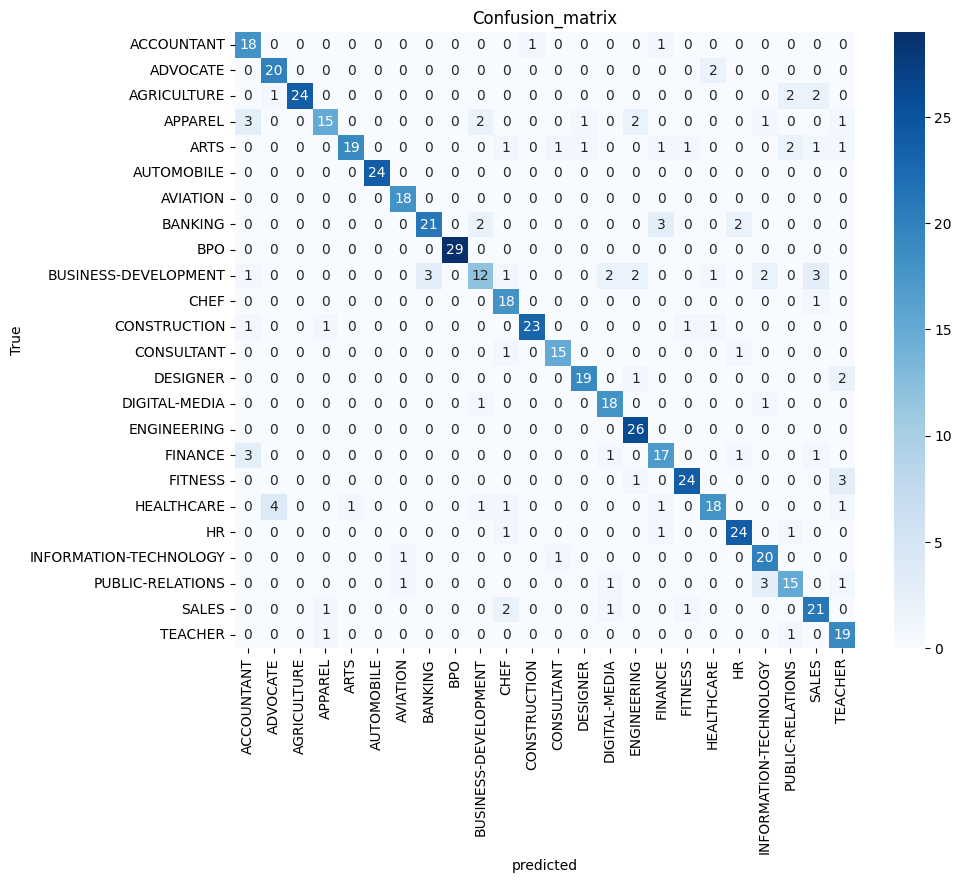

In [35]:
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=rf_classifier.classes_,yticklabels=rf_classifier.classes_)
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion_matrix')
plt.show()

In [47]:
import re
def cleanResume(txt):
    cleanText=re.sub('http\S+\s',' ',txt)
    cleanText=re.sub('RT|cc',' ',cleanText)
    cleanText=re.sub('#\S+\s',' ',cleanText)
    cleanText=re.sub('@\S+',' ',cleanText)
    cleanText=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanText)
    cleanText=re.sub(r'[^\x00-\x7f]',' ',cleanText)
    cleanText=re.sub('\s+',' ',cleanText)
    return cleanText


#prediction and category name
def predict_category(resume_text):
    resume_text=cleanResume(resume_text)
    resume_tfidf=tfidf_vectorizer.transform([resume_text])
    predicted_category=rf_classifier.predict(resume_tfidf)[0]
    return predicted_category
    

In [48]:
resume_file="""fitness coordinator objective seeking challenging environment allows contribute continued success growth organization obtain position opportunity apply education administrative fitness experience grow professional education may master science recreation administration concentration facilities management western kentucky university city state may bachelor science exercise science western kentucky university city state employment experience current fitness coordinator company name city state jhhfhgjkkghj fdsafafsa facility coordinator intern membership specialist company name city state assist facility supervision train staff members knowledgeable perform fitness services resting blood pressure body composition circumference measurements aid corporate presentations various aspects health wellness obesity hypertension diabetes sedentary lifestyle relation exercise help membership sells retention conducting facility tours program promotion individualized consultations members work closely facility manager pro shop coordinator head membership specialist provide optimal experiences services personal training fitness counseling adequate equipment nutritional aspects members group exercise instructor company name city state instruct lead patrons safe challenging exercises abdominals core toning format well boot camp setting graduate assistant exercise company name city state assist training scheduling supervision evaluation fitness center attendants currently supervise attendants assist equipment purchase product research equipment campus fitness center facilitate development policies procedures regarding safety patrons aesthetics facility coordinate facility equipment maintenance assist website management program promotions supervise daily operations square feet fitness center supervise university recreational facility square feet weekends assist professional staff presentations promoting wellu student wellness program professional development conferences student involvement intramural recreational sports department assist inventory maintenance health fitness lab fitness center equipment track equipment usage determine proper rotation fitness center equipment contribute daily operations health fitness lab including maintaining regular schedule fitness services fitness assessments exercise prescription body composition individual consultations track evaluate health fitness lab programs fitness center usage patterns perform research benchmark universities facilities assist office supervision various administrative duties lab assistant company name city state conduct fitness assessments including body composition analysis skinfold calipers bioelectrical impedance height weight measurements sub maximal vo testing flexibility evaluation muscular endurance strength blood pressure screenings exercise prescription offer exercise consultation program design implementation exercise programs provide demonstration guidance proper usage equipment assist marketing programs using various advertising mediums adobe cs programs design host wellness fitness events muscle month challenge big red rep bench healthy days received rookie year award based job performance research assistant company name city state conduct assist research studies exercise post oxygen consumption epoc callahan study involving maximal sub maximal vo testing apoptosis research presented annual american college sports medicine conference assist professors students class research labs memberships affiliations american college sports medicine national intramural recreational sports association aerobic fitness association afaa usa weightlifting skills competencies proficient microsoft office including w ord excel power point outlook skilled adobe cs cs software including illustrator photoshop campus management system design upkeep website trained csi asset management system well fusion equipment check scheduling services analyzing reports professional certifications acsm certified health fitness specialist afaa certified personal fitness trainer usa weightlifting level sports conditioning coach medic first aid cpr automated external defibrillator first aid blood borne pathogens"""
predicted_category=predict_category(resume_file)
print("Predicted Category:",predicted_category)

Predicted Category: FITNESS


save models


In [50]:
import pickle
pickle.dump(rf_classifier,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/tfidf_vectorizer_categorization.pkl','wb'))